In [2]:
from transformers import pipeline

# T·∫£i m√¥ h√¨nh
sentiment_pipeline = pipeline("sentiment-analysis", model="wangzes-kevo/soccer-tweet-sentiment")



Device set to use cuda:0


In [3]:
# Ki·ªÉm tra m√¥ h√¨nh v·ªõi m·ªôt tweet v√≠ d·ª•
tweet = "Binh don't need to play anymore, should go home and play with mom"
result = sentiment_pipeline(tweet)
print(result)

[{'label': 'negative', 'score': 0.6393948197364807}]


In [4]:
type(result[0])

dict

In [5]:
import pandas as pd

from tqdm import tqdm  # Import th∆∞ vi·ªán tqdm
file_path = r"C:\Users\DO TUAN MINH\Desktop\ben\Learn\Reddit_Sentiment_Analysis\dataframe\comments_data.csv"
df = pd.read_csv(file_path)
# H√†m ph√¢n t√≠ch c·∫£m x√∫c
def analyze_comment(comment):
    try:
        if pd.isna(comment) or comment.strip() == "":
            return pd.Series(["NEUTRAL", 0.0])  # X·ª≠ l√Ω comment tr·ªëng
        result = sentiment_pipeline(comment)
        sentiment = result[0]["label"]
        score = result[0]["score"]
        return pd.Series([sentiment, score])  # Tr·∫£ v·ªÅ m·ªôt Series ƒë·ªÉ t·∫°o th√†nh hai c·ªôt m·ªõi
    except Exception as e:
        print(f"L·ªói khi x·ª≠ l√Ω comment: {comment}, L·ªói: {e}")
        return pd.Series(["ERROR", 0.0])  # Tr·∫£ v·ªÅ gi√° tr·ªã m·∫∑c ƒë·ªãnh n·∫øu c√≥ l·ªói

# √Åp d·ª•ng h√†m l√™n dataframe v·ªõi thanh ti·∫øn tr√¨nh tqdm
tqdm.pandas()  # K√≠ch ho·∫°t tqdm cho pandas
df[["Sentiment", "Score"]] = df["comment_text"].progress_apply(analyze_comment)  # S·ª≠ d·ª•ng progress_apply thay cho apply

# In k·∫øt qu·∫£
print("Ho√†n th√†nh x·ª≠ l√Ω!")
print(df.head())

 32%|‚ñà‚ñà‚ñà‚ñè      | 60160/186304 [08:28<14:01, 149.83it/s]

L·ªói khi x·ª≠ l√Ω comment: Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. 
Leicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL  Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do 

 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 128930/186304 [16:05<06:15, 152.72it/s]

L·ªói khi x·ª≠ l√Ω comment: Tell me what you guys think about this premier league table...What emojis can be used for what teams? I tried as best I could lol

| Pos. | üèÜ Team                  | MP | W  | D  | L  | GF | GA | GD  | P  | Form                |
|------|--------------------------|----|----|----|----|----|----|-----|----|---------------------|
| 1    | üî¥ Liverpool            | 12 | 10 | 1  | 1  | 24 | 8  | +16 | 31 | ‚úÖ ‚úÖ ‚úÖ ü§ù ‚úÖ       |
| 2    | üî¥ Arsenal              | 13 | 7  | 4  | 2  | 26 | 14 | +12 | 25 | ‚úÖ ‚úÖ ü§ù ‚ùå ü§ù       |
| 3    | üü° Brighton             | 13 | 6  | 5  | 2  | 22 | 17 | +5  | 23 | ü§ù ‚úÖ ‚úÖ ‚ùå ü§ù       |
| 4    | üîµ Manchester City      | 12 | 7  | 2  | 3  | 22 | 17 | +5  | 23 | ‚ùå ‚ùå ‚ùå ‚úÖ ‚úÖ       |
| 5    | üîµ Chelsea              | 12 | 6  | 4  | 2  | 23 | 14 | +9  | 22 | ‚úÖ ü§ù ü§ù ‚úÖ ‚ùå       |
| 6    | üå≥ Nottingham Forest    | 13 | 6  | 4  | 3  | 16 | 13 | +3  | 22 | ‚úÖ ‚ùå ‚ùå ‚úÖ ‚úÖ       

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 186304/186304 [22:19<00:00, 139.12it/s]

Ho√†n th√†nh x·ª≠ l√Ω!
         match_time  matchday          home_team away_team  home_score  \
0  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
1  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
2  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
3  2024-08-16 19:00         1  Manchester United    Fulham         1.0   
4  2024-08-16 19:00         1  Manchester United    Fulham         1.0   

   away_score                winner       referee comment_id  post_id  \
0         0.0  Manchester United FC  Robert Jones    lig7w2h  1etwv7n   
1         0.0  Manchester United FC  Robert Jones    lig7wlr  1etwv7n   
2         0.0  Manchester United FC  Robert Jones    lig7wu5  1etwv7n   
3         0.0  Manchester United FC  Robert Jones    lig7xl9  1etwv7n   
4         0.0  Manchester United FC  Robert Jones    lig7ydl  1etwv7n   

                                        comment_text  comment_time  \
0             I am read

In [10]:
df

match_time  matchday          home_team  away_team  home_score  \
0       2024-08-16 19:00         1  Manchester United     Fulham         1.0   
1       2024-08-16 19:00         1  Manchester United     Fulham         1.0   
2       2024-08-16 19:00         1  Manchester United     Fulham         1.0   
3       2024-08-16 19:00         1  Manchester United     Fulham         1.0   
4       2024-08-16 19:00         1  Manchester United     Fulham         1.0   
...                  ...       ...                ...        ...         ...   
186299  2025-02-12 19:30        15            Everton  Liverpool         2.0   
186300  2025-02-12 19:30        15            Everton  Liverpool         2.0   
186301  2025-02-12 19:30        15            Everton  Liverpool         2.0   
186302  2025-02-12 19:30        15            Everton  Liverpool         2.0   
186303  2025-02-12 19:30        15            Everton  Liverpool         2.0   

        away_score                winner         referee comment_id  post_id  \
0              0.0  Manchester United FC    Robert Jones    lig7w2h  1etwv7n   
1              0.0  Manchester United FC    Robert Jones    lig7wlr  1etwv7n   
2              0.0  Manchester United FC    Robert Jones    lig7wu5  1etwv7n   
3              0.0  Manchester United FC    Robert Jones    lig7xl9  1etwv7n   
4              0.0  Manchester United FC    Robert Jones    lig7ydl  1etwv7n   
...            ...                   ...             ...        ...      ...   
186299         2.0                  DRAW  Michael Oliver    mch5205  1inz7qb   
186300         2.0                  DRAW  Michael Oliver    mcheprv  1inz7qb   
186301         2.0                  DRAW  Michael Oliver    mchk4nd  1inz7qb   
186302         2.0                  DRAW  Michael Oliver    mciv7os  1inz7qb   
186303         2.0                  DRAW  Michael Oliver    mcj4vci  1inz7qb   

                                                                                                                                                                        comment_text  \
0                                                                                                                                             I am ready I have my Gamst stream open   
1                                                                                                                                                          Premier League is back!!!   
2                                                                                                                          That sky advert was absolutely rotten. Melodramatic shite   
3                           Put it on at 7.30 whilst I made dinner and the number of betting adverts I heard in the background was ridiculous. \n\nAnyway, excited football is back!   
4                                                                                                                                                                      cam on fulham   
...                                                                                                                                                                              ...   
186299  You can tell this really is the best thing to happen to Everton fans since they qualified for Europa in 2017 lol. They will be holding on to this draw for a good long time.   
186300                                                                                                                          I know right, imagine going that mental over a draw.   
186301                      ChadTheGooner with a Man U flair commenting about loving Everton. \nFucking beggars belief. Choose 1 of them & stick to it, you absolute fucking weapon.   
186302                                                                                                                                          Everton have always been my 4th team   
186303                                                              

In [11]:
# L·ªçc c√°c d√≤ng c√≥ c·ªôt Sentiment l√† NaN
nan_sentiment_rows = df[df["Sentiment"]=="ERROR"]

# In ra c√°c d√≤ng b·ªã l·ªói
if not nan_sentiment_rows.empty:
    print("C√°c d√≤ng b·ªã l·ªói khi x·ª≠ l√Ω sentiment:")
    print(nan_sentiment_rows[["comment_text", "Sentiment", "Score"]])
else:
    print("Kh√¥ng c√≥ d√≤ng n√†o b·ªã l·ªói.")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
nan_sentiment_rows["comment_text"]

C√°c d√≤ng b·ªã l·ªói khi x·ª≠ l√Ω sentiment:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

60132     Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. \nLeicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL  Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in for that LB position. I honestly wld still rather have him over Zinchenko anyday (still love Zinny) but I still do beleive Benny as 

In [15]:
df[df["Sentiment"]=="ERROR"]

match_time  matchday  home_team        away_team  home_score  \
60132   2024-09-28 14:00         6    Arsenal   Leicester City         4.0   
128916  2024-12-01 16:00        13  Liverpool  Manchester City         2.0   

        away_score        winner         referee comment_id  post_id  \
60132          2.0    Arsenal FC     Sam Barrott    lpggml8  1frey5d   
128916         0.0  Liverpool FC  Chris Kavanagh    lzwds6u  1h464hu   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       comment_text  \
60132   Yeah honestly a bit frustrating when pundits say this puts questions around Arsenals challenge credentials. By all means giving up a 2 goal lead is unacceptable but u gotta look at context. \nLeicster scored in the first 2 minutes of the 2nd half from a massive deflection. Their second goal was a honest wonder strike. Should have defended better but Califiori is still learning the system and Timber is essentially being introduced to the EPL  Timber has looked absolute class after returning from a year long injury recovery and adjusting to the actual on field level of competition. Califiori has looked a bit shaky defensively at times but is fortunate to have a quality CB pairing and capable midfield around him to try and help alleviate any mistakes. He has shown great glimpses going forward demonstrating the exact reason Arteta has brought him in f

In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DO TUAN MINH\Desktop\ben\Learn\DAP391m\Hugging_Face_comments_sentiment.csv")

In [2]:
df

match_time  matchday               home_team  \
0       2024-09-28 14:00         6                 Arsenal   
1       2024-12-01 16:00        13               Liverpool   
2       2024-09-01 15:00         3       Manchester United   
3       2024-11-09 17:30        11  Brighton & Hove Albion   
4       2024-09-01 15:00         3       Manchester United   
...                  ...       ...                     ...   
186299               NaN         5             Aston Villa   
186300               NaN         8                  Fulham   
186301               NaN        13          Crystal Palace   
186302               NaN        17         West Ham United   
186303               NaN        12             Aston Villa   

                      away_team  home_score  away_score  \
0                Leicester City         4.0         2.0   
1               Manchester City         2.0         0.0   
2                     Liverpool         0.0         3.0   
3               Manchester City         2.0         1.0   
4                     Liverpool         0.0         3.0   
...                         ...         ...         ...   
186299  Wolverhampton Wanderers         3.0         1.0   
186300              Aston Villa         1.0         3.0   
186301         Newcastle United         1.0         1.0   
186302   Brighton & Hove Albion         1.0         1.0   
186303           Crystal Palace         2.0         2.0   

                           winner         referee comment_id  post_id  \
0                      Arsenal FC     Sam Barrott    lpggml8  1frey5d   
1                    Liverpool FC  Chris Kavanagh    lzwds6u  1h464hu   
2                    Liverpool FC  Anthony Taylor    ll363go  1f6j9hv   
3       Brighton & Hove Albion FC     Sam Barrott    lwhjgnz  1gnhuuj   
4                    Liverpool FC  Anthony Taylor    ll0x1qm  1f6j9hv   
...                           ...             ...        ...      ...   
186299             Aston Villa FC    Tim Robinson        NaN      NaN   
186300             Aston Villa FC  Darren England        NaN      NaN   
186301                       DRAW  Darren England        NaN      NaN   
186302                       DRAW    Robert Jones        NaN      NaN   
186303                       DRAW    Tim Robinson        NaN      NaN   

                                             comment_text  comment_time  \
0       Yeah honestly a bit frustrating when pundits s...  1.727592e+09   
1       Tell me what you guys think about this premier...  1.733075e+09   
2       The problem with United is not new. They keep ...  1.725244e+09   
3       Rb: Walker is past it. Rico is not good enough...  1.731278e+09   
4       ETH is a weird one. \n\nI'm pretty sure there ...  1.725215e+09   
...                                                   ...           ...   
186299                                                NaN           NaN   
186300                                                NaN           NaN   
186301                                                NaN           NaN   
186302                                                NaN           NaN   
186303                                                NaN           NaN   

          comment_author  comment_score  comment_length Sentiment     Score  
0       MateusAmadeus714            2.0            2677   neutral  0.000000  
1         VivaLosHeavies            2.0            2347   neutral  0.000000  
2         benhanks040888            1.0            2044   neutral  0.680526  
3           Sneaky-Alien            2.0            1955  negative  0.569821  
4                tocitus            1.0            1817  negative  0.943051  
...                  ...            ...             ...       ...       ...  
186299               NaN            NaN               0   NEUTRAL  0.000000  
186300               NaN            NaN               0   NEUTRAL  0.000000  
186301               NaN            NaN               0   NEUTRAL  0.000000  
18

In [26]:
df = df[df["Sentiment"] != "NEUTRAL"]

In [45]:
deleted_comments = df[df["comment_text"] == "[deleted]"]
print(deleted_comments)
df = df[df["comment_text"] != "[deleted]"]

              match_time  matchday               home_team          away_team  \
175912  2024-08-17 11:30         1            Ipswich Town          Liverpool   
175913  2024-11-24 14:00        12             Southampton          Liverpool   
175914  2024-11-24 14:00        12             Southampton          Liverpool   
175918  2024-12-03 19:30        14            Ipswich Town     Crystal Palace   
175919  2024-11-24 16:30        12            Ipswich Town  Manchester United   
...                  ...       ...                     ...                ...   
179883  2024-10-19 16:30         8           A Bournemouth            Arsenal   
179884  2025-02-12 19:30        15                 Everton          Liverpool   
179885  2024-09-22 15:30         5         Manchester City            Arsenal   
179886  2024-08-24 11:30         2  Brighton & Hove Albion  Manchester United   
179894  2024-12-29 17:15        19         West Ham United          Liverpool   

        home_score  away_sc

In [46]:
deleted_comments = df[df["comment_text"] == "[deleted]"]
print(deleted_comments)

Empty DataFrame
Columns: [match_time, matchday, home_team, away_team, home_score, away_score, winner, referee, comment_id, post_id, comment_text, comment_time, comment_author, comment_score, comment_length, Sentiment, Score]
Index: []


C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\883346779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


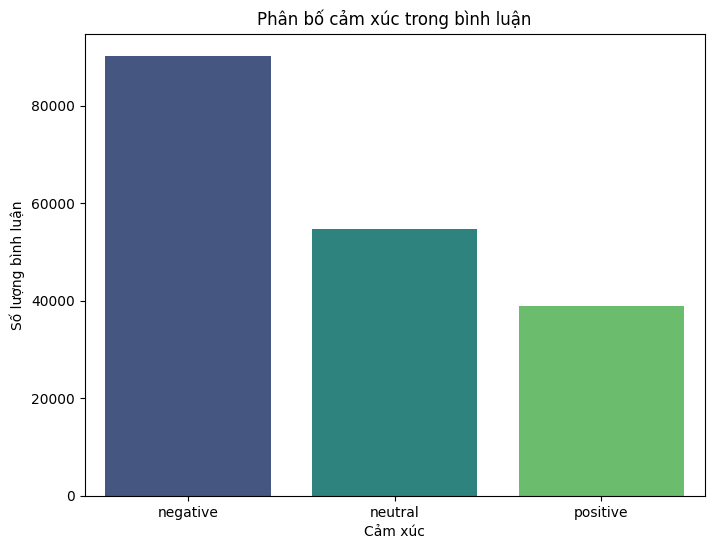

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# ƒê·∫øm s·ªë l∆∞·ª£ng t·ª´ng lo·∫°i c·∫£m x√∫c
sentiment_counts = df["Sentiment"].value_counts()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Ph√¢n b·ªë c·∫£m x√∫c trong b√¨nh lu·∫≠n")
plt.xlabel("C·∫£m x√∫c")
plt.ylabel("S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n")
plt.show()

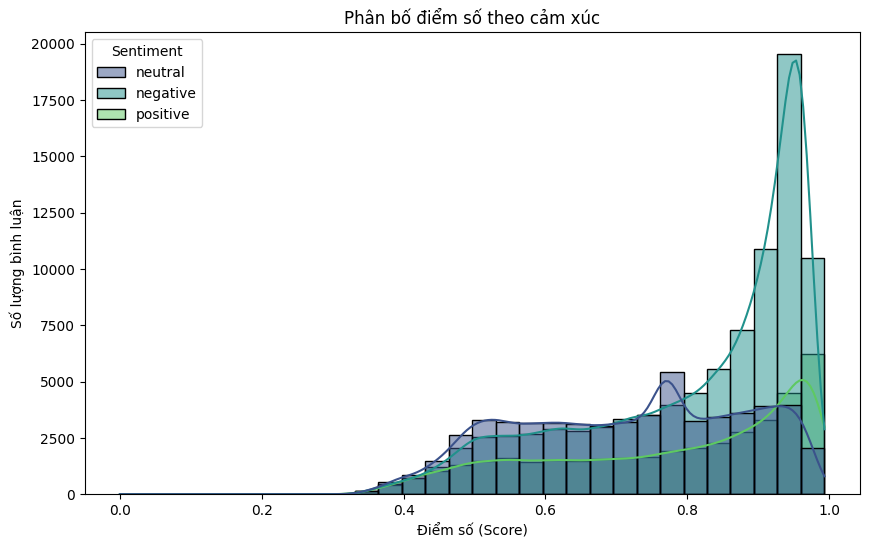

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", hue="Sentiment", kde=True, palette="viridis", bins=30)
plt.title("Ph√¢n b·ªë ƒëi·ªÉm s·ªë theo c·∫£m x√∫c")
plt.xlabel("ƒêi·ªÉm s·ªë (Score)")
plt.ylabel("S·ªë l∆∞·ª£ng b√¨nh lu·∫≠n")
plt.show()

In [48]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# H√†m tr√≠ch xu·∫•t top t·ª´ ph·ªï bi·∫øn
def get_top_words(texts, n=10):
    vectorizer = CountVectorizer(stop_words="english")
    word_counts = vectorizer.fit_transform(texts)
    word_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0])))
    return word_counts.most_common(n)

# L·∫•y top t·ª´ cho t·ª´ng lo·∫°i c·∫£m x√∫c
positive_comments = df[df["Sentiment"] == "positive"]["comment_text"]
negative_comments = df[df["Sentiment"] == "negative"]["comment_text"]
neutral_comments = df[df["Sentiment"] == "neutral"]["comment_text"]

top_positive_words = get_top_words(positive_comments)
top_negative_words = get_top_words(negative_comments)
top_neutral_words = get_top_words(neutral_comments)

# In k·∫øt qu·∫£
print("Top t·ª´ t√≠ch c·ª±c:", top_positive_words)
print("Top t·ª´ ti√™u c·ª±c:", top_negative_words)
print("Top t·ª´ trung t√≠nh:", top_neutral_words)

Top t·ª´ t√≠ch c·ª±c: [('good', 4052), ('game', 2301), ('like', 1986), ('great', 1977), ('just', 1949), ('lol', 1725), ('goal', 1622), ('season', 1457), ('really', 1385), ('best', 1371)]
Top t·ª´ ti√™u c·ª±c: [('just', 8681), ('like', 7323), ('game', 5467), ('arsenal', 4214), ('fucking', 4200), ('shit', 4189), ('don', 4185), ('ball', 4181), ('fuck', 4112), ('ref', 3642)]
Top t·ª´ trung t√≠nh: [('just', 2642), ('like', 2508), ('lol', 1889), ('game', 1837), ('ball', 1830), ('think', 1736), ('time', 1529), ('did', 1380), ('city', 1344), ('yellow', 1341)]


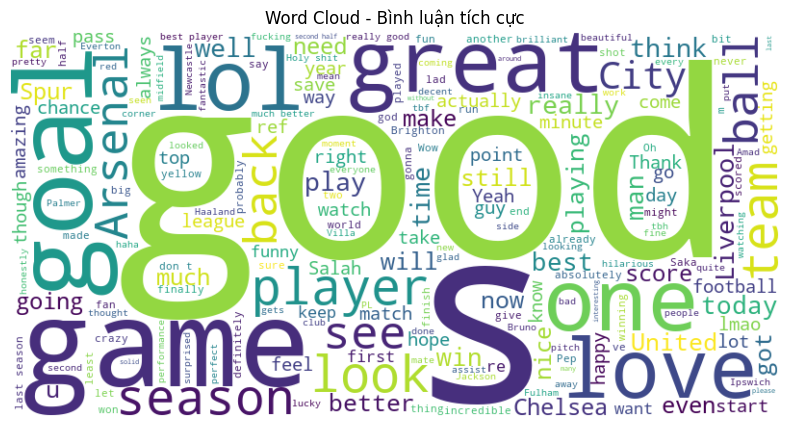

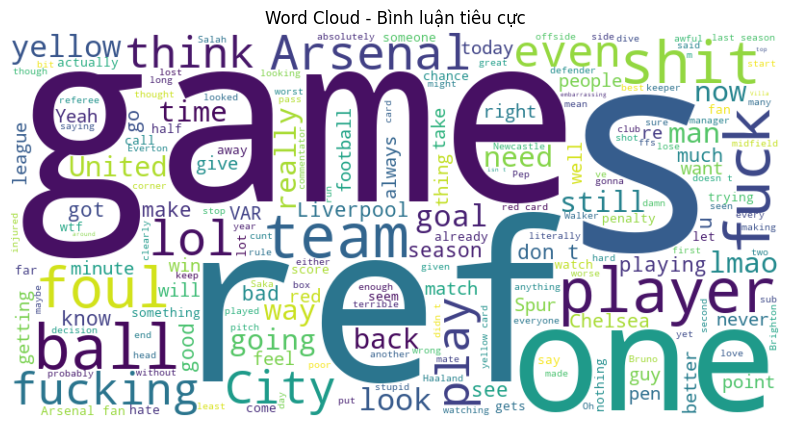

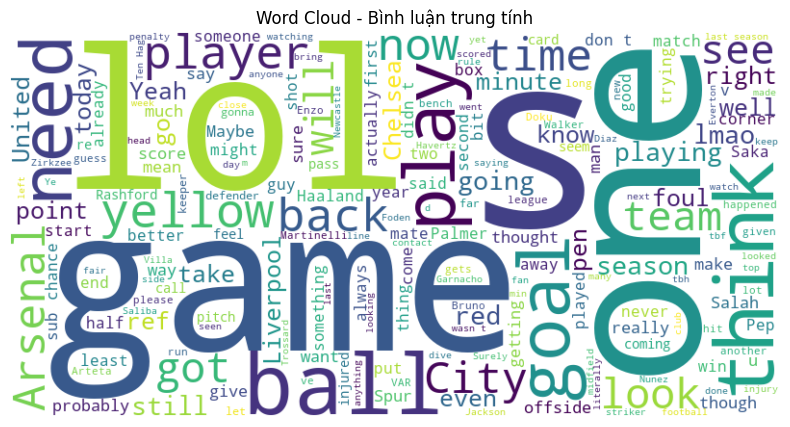

In [49]:
from wordcloud import WordCloud

# H√†m t·∫°o word cloud
def generate_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# T·∫°o word cloud cho t·ª´ng lo·∫°i c·∫£m x√∫c
generate_wordcloud(positive_comments, "Word Cloud - B√¨nh lu·∫≠n t√≠ch c·ª±c")
generate_wordcloud(negative_comments, "Word Cloud - B√¨nh lu·∫≠n ti√™u c·ª±c")
generate_wordcloud(neutral_comments, "Word Cloud - B√¨nh lu·∫≠n trung t√≠nh")

In [43]:
df

match_time  matchday               home_team          away_team  \
0       2024-09-28 14:00         6                 Arsenal     Leicester City   
1       2024-12-01 16:00        13               Liverpool    Manchester City   
2       2024-09-01 15:00         3       Manchester United          Liverpool   
3       2024-11-09 17:30        11  Brighton & Hove Albion    Manchester City   
4       2024-09-01 15:00         3       Manchester United          Liverpool   
...                  ...       ...                     ...                ...   
186283  2024-08-19 19:00         1          Leicester City  Tottenham Hotspur   
186284  2024-11-03 16:30        10       Manchester United            Chelsea   
186285  2024-12-22 14:00        17       Manchester United      A Bournemouth   
186286  2024-11-23 15:00        12                 Arsenal  Nottingham Forest   
186287  2024-12-03 20:15        14          Leicester City    West Ham United   

        home_score  away_score                     winner         referee  \
0              4.0         2.0                 Arsenal FC     Sam Barrott   
1              2.0         0.0               Liverpool FC  Chris Kavanagh   
2              0.0         3.0               Liverpool FC  Anthony Taylor   
3              2.0         1.0  Brighton & Hove Albion FC     Sam Barrott   
4              0.0         3.0               Liverpool FC  Anthony Taylor   
...            ...         ...                        ...             ...   
186283         1.0         1.0                       DRAW  Chris Kavanagh   
186284         1.0         1.0                       DRAW    Robert Jones   
186285         0.0         3.0            AFC Bournemouth    Craig Pawson   
186286         3.0         0.0                 Arsenal FC    Simon Hooper   
186287         3.0         1.0          Leicester City FC    Joshua Smith   

       comment_id  post_id  \
0         lpggml8  1frey5d   
1         lzwds6u  1h464hu   
2         ll363go  1f6j9hv   
3         lwhjgnz  1gnhuuj   
4         ll0x1qm  1f6j9hv   
...           ...      ...   
186283    lixiy5u  1ew9irk   
186284    lv7n8xd  1giqk9j   
186285    m3ai36t  1hjyzz8   
186286    lyljq22  1gy1gh9   
186287    m09lql8  1h5wn2q   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\3820625630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["comment_length"] = df["comment_text"].apply(len)
C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_10372\3820625630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Sentiment", y="comment_length", palette="viridis")


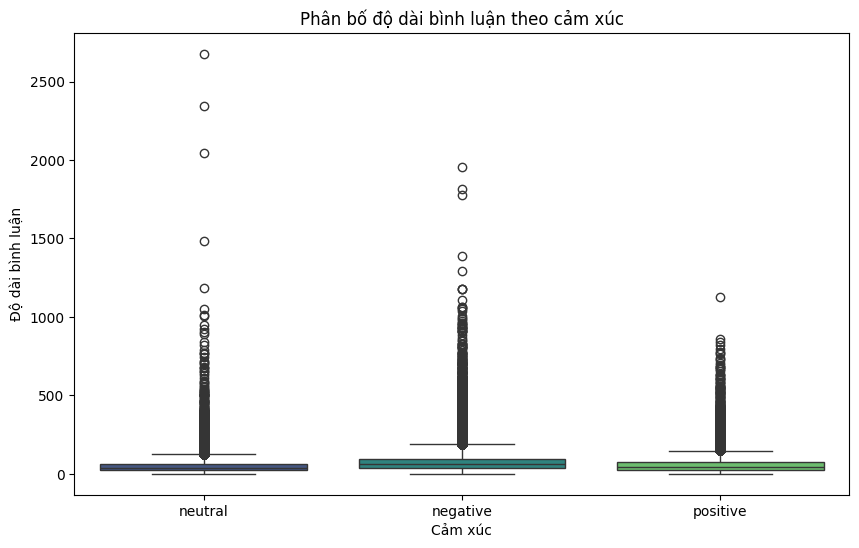

In [50]:
# Th√™m c·ªôt ƒë·ªô d√†i b√¨nh lu·∫≠n
df["comment_length"] = df["comment_text"].apply(len)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Sentiment", y="comment_length", palette="viridis")
plt.title("Ph√¢n b·ªë ƒë·ªô d√†i b√¨nh lu·∫≠n theo c·∫£m x√∫c")
plt.xlabel("C·∫£m x√∫c")
plt.ylabel("ƒê·ªô d√†i b√¨nh lu·∫≠n")
plt.show()